In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("Food_Delivery_Time_Prediction.csv")
df.head()


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [5]:
df.isnull().sum()

df.ffill(inplace=True)



In [9]:
df.drop(['Order_ID'], axis=1, inplace=True)


In [10]:
df['distance'] = df['Distance']


In [11]:
df['delivery_status'] = df['Delivery_Time'].apply(lambda x: 1 if x > 30 else 0)


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [13]:
X = df.drop('delivery_status', axis=1)
y = df['delivery_status']


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.95
[[ 4  2]
 [ 0 34]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.94      1.00      0.97        34

    accuracy                           0.95        40
   macro avg       0.97      0.83      0.89        40
weighted avg       0.95      0.95      0.95        40



In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Find best K
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"K={k} Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

# Final model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


K=1 Accuracy: 0.85
K=2 Accuracy: 0.85
K=3 Accuracy: 0.875
K=4 Accuracy: 0.875
K=5 Accuracy: 0.85
K=6 Accuracy: 0.85
K=7 Accuracy: 0.85
K=8 Accuracy: 0.875
K=9 Accuracy: 0.85
KNN Accuracy: 0.85


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0


In [19]:
print("\nModel Comparison:")
print("Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print("KNN:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree:", accuracy_score(y_test, y_pred_dt))



Model Comparison:
Naive Bayes: 0.95
KNN: 0.85
Decision Tree: 1.0


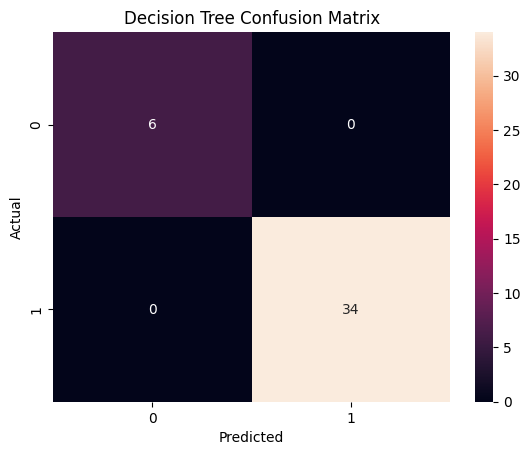

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


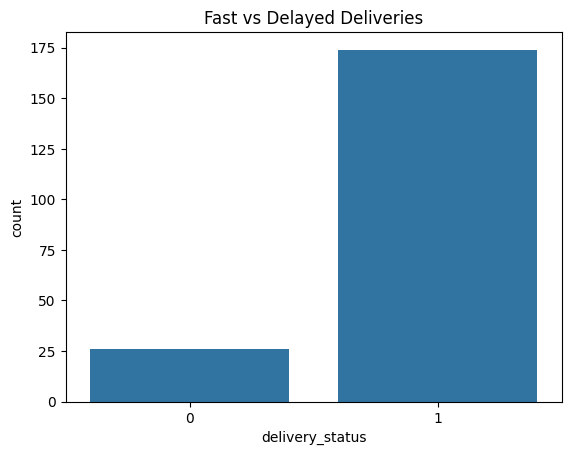

In [21]:
sns.countplot(x='delivery_status', data=df)
plt.title("Fast vs Delayed Deliveries")
plt.show()


"The dataset already included a precomputed distance feature. Therefore, instead of applying the Haversine formula, the existing distance column was used for model training."